# DAY3 - Regression - Geçmiş Verilerden Tahmin Etme

Day3 Regression dersinin kodlarını burada çalışacağım.

In [1]:
#pip install xlrd

In [2]:
import pandas as pd #data dosyalarını okuma paketi

In [3]:
df=pd.read_excel('cars.xls')

### EDA Exploratory Data Analysis

In [4]:
df.head()

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1

In [5]:
df.shape #satır,sütun sayısı

(804, 12)

In [6]:
len(df) #satır sayısı

804

In [7]:
df.sample(5)

Price  Mileage       Make        Model               Trim   Type  \
126  32509.478288    20910   Cadillac      Deville           Sedan 4D  Sedan   
32   23016.008009    18147      Buick     Lacrosse       CXS Sedan 4D  Sedan   
470  23573.822002    12466  Chevrolet  Monte Carlo        SS Coupe 2D  Coupe   
274  11574.173813    21525  Chevrolet     Cavalier           Sedan 4D  Sedan   
256  13141.047950    19898  Chevrolet     Cavalier  LS Sport Coupe 2D  Coupe   

     Cylinder  Liter  Doors  Cruise  Sound  Leather  
126         8    4.6      4       1      0        1  
32          6    3.8      4       1      1        1  
470         6    3.8      2       1      1        0  
274         4    2.2      4       0      1        1  
256         4    2.2      2       1      1        1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [9]:
df.describe() #istatistik

Price       Mileage    Cylinder       Liter       Doors  \
count    804.000000    804.000000  804.000000  804.000000  804.000000   
mean   21343.143767  19831.934080    5.268657    3.037313    3.527363   
std     9884.852801   8196.319707    1.387531    1.105562    0.850169   
min     8638.930895    266.000000    4.000000    1.600000    2.000000   
25%    14273.073870  14623.500000    4.000000    2.200000    4.000000   
50%    18024.995019  20913.500000    6.000000    2.800000    4.000000   
75%    26717.316636  25213.000000    6.000000    3.800000    4.000000   
max    70755.466717  50387.000000    8.000000    6.000000    4.000000   

           Cruise       Sound     Leather  
count  804.000000  804.000000  804.000000  
mean     0.752488    0.679104    0.723881  
std      0.431836    0.467111    0.447355  
min      0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000  
50%      1.000000    1.000000    1.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

In [10]:
df.corr(numeric_only=True)

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

In [11]:
import seaborn as sns

<Axes: >

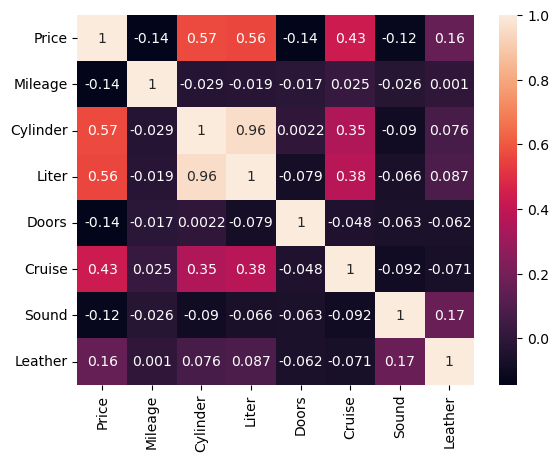

In [26]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
#first vs commit 

In [13]:
#outlier formülü: (ortalama+-3 * standart sapma)

In [14]:
df['Price'].mean(),df['Price'].median(),df['Price'].min(),df['Price'].max(),df['Price'].std()

(21343.143767325837,
 18024.995019071903,
 8638.930895260657,
 70755.46671654288,
 9884.852800898007)

In [15]:
df.tail() #son 5 satır

Price  Mileage    Make     Model           Trim   Type  Cylinder  \
799  16507.070267    16229  Saturn  L Series  L300 Sedan 4D  Sedan         6   
800  16175.957604    19095  Saturn  L Series  L300 Sedan 4D  Sedan         6   
801  15731.132897    20484  Saturn  L Series  L300 Sedan 4D  Sedan         6   
802  15118.893228    25979  Saturn  L Series  L300 Sedan 4D  Sedan         6   
803  13585.636802    35662  Saturn  L Series  L300 Sedan 4D  Sedan         6   

     Liter  Doors  Cruise  Sound  Leather  
799    3.0      4       1      0        0  
800    3.0      4       1      1        0  
801    3.0      4       1      1        0  
802    3.0      4       1      1        0  
803    3.0      4       1      0        0

In [16]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [17]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [18]:
df['Make'].nunique()

6

In [19]:
df['Make'].value_counts() #hangi marka kaç adet

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

In [20]:
df['Make'].value_counts(normalize=True)

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

In [21]:
#!pip install --upgrade seaborn

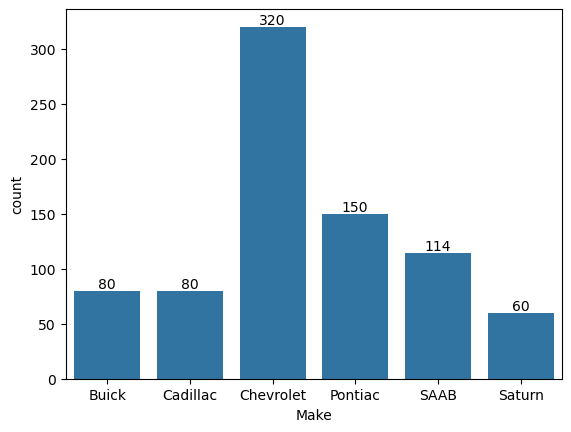

In [22]:
ax=sns.countplot(x=df['Make'])
ax.bar_label(ax.containers[0]);

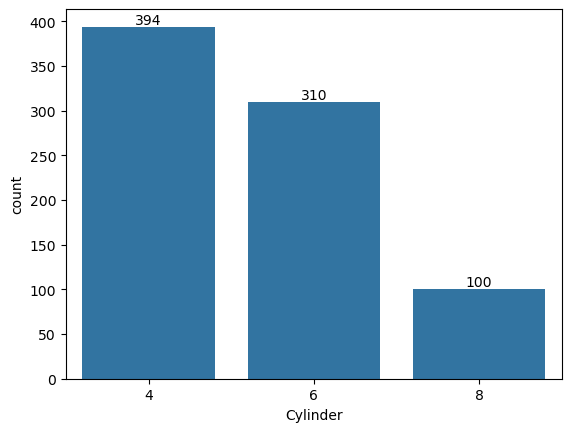

In [23]:
ax=sns.countplot(x=df['Cylinder'])
ax.bar_label(ax.containers[0]);

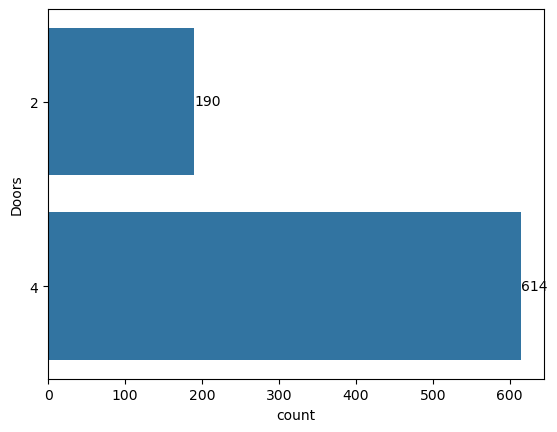

In [24]:
ay=sns.countplot(y=df['Doors'])
ay.bar_label(ay.containers[0]);

KeyboardInterrupt: 

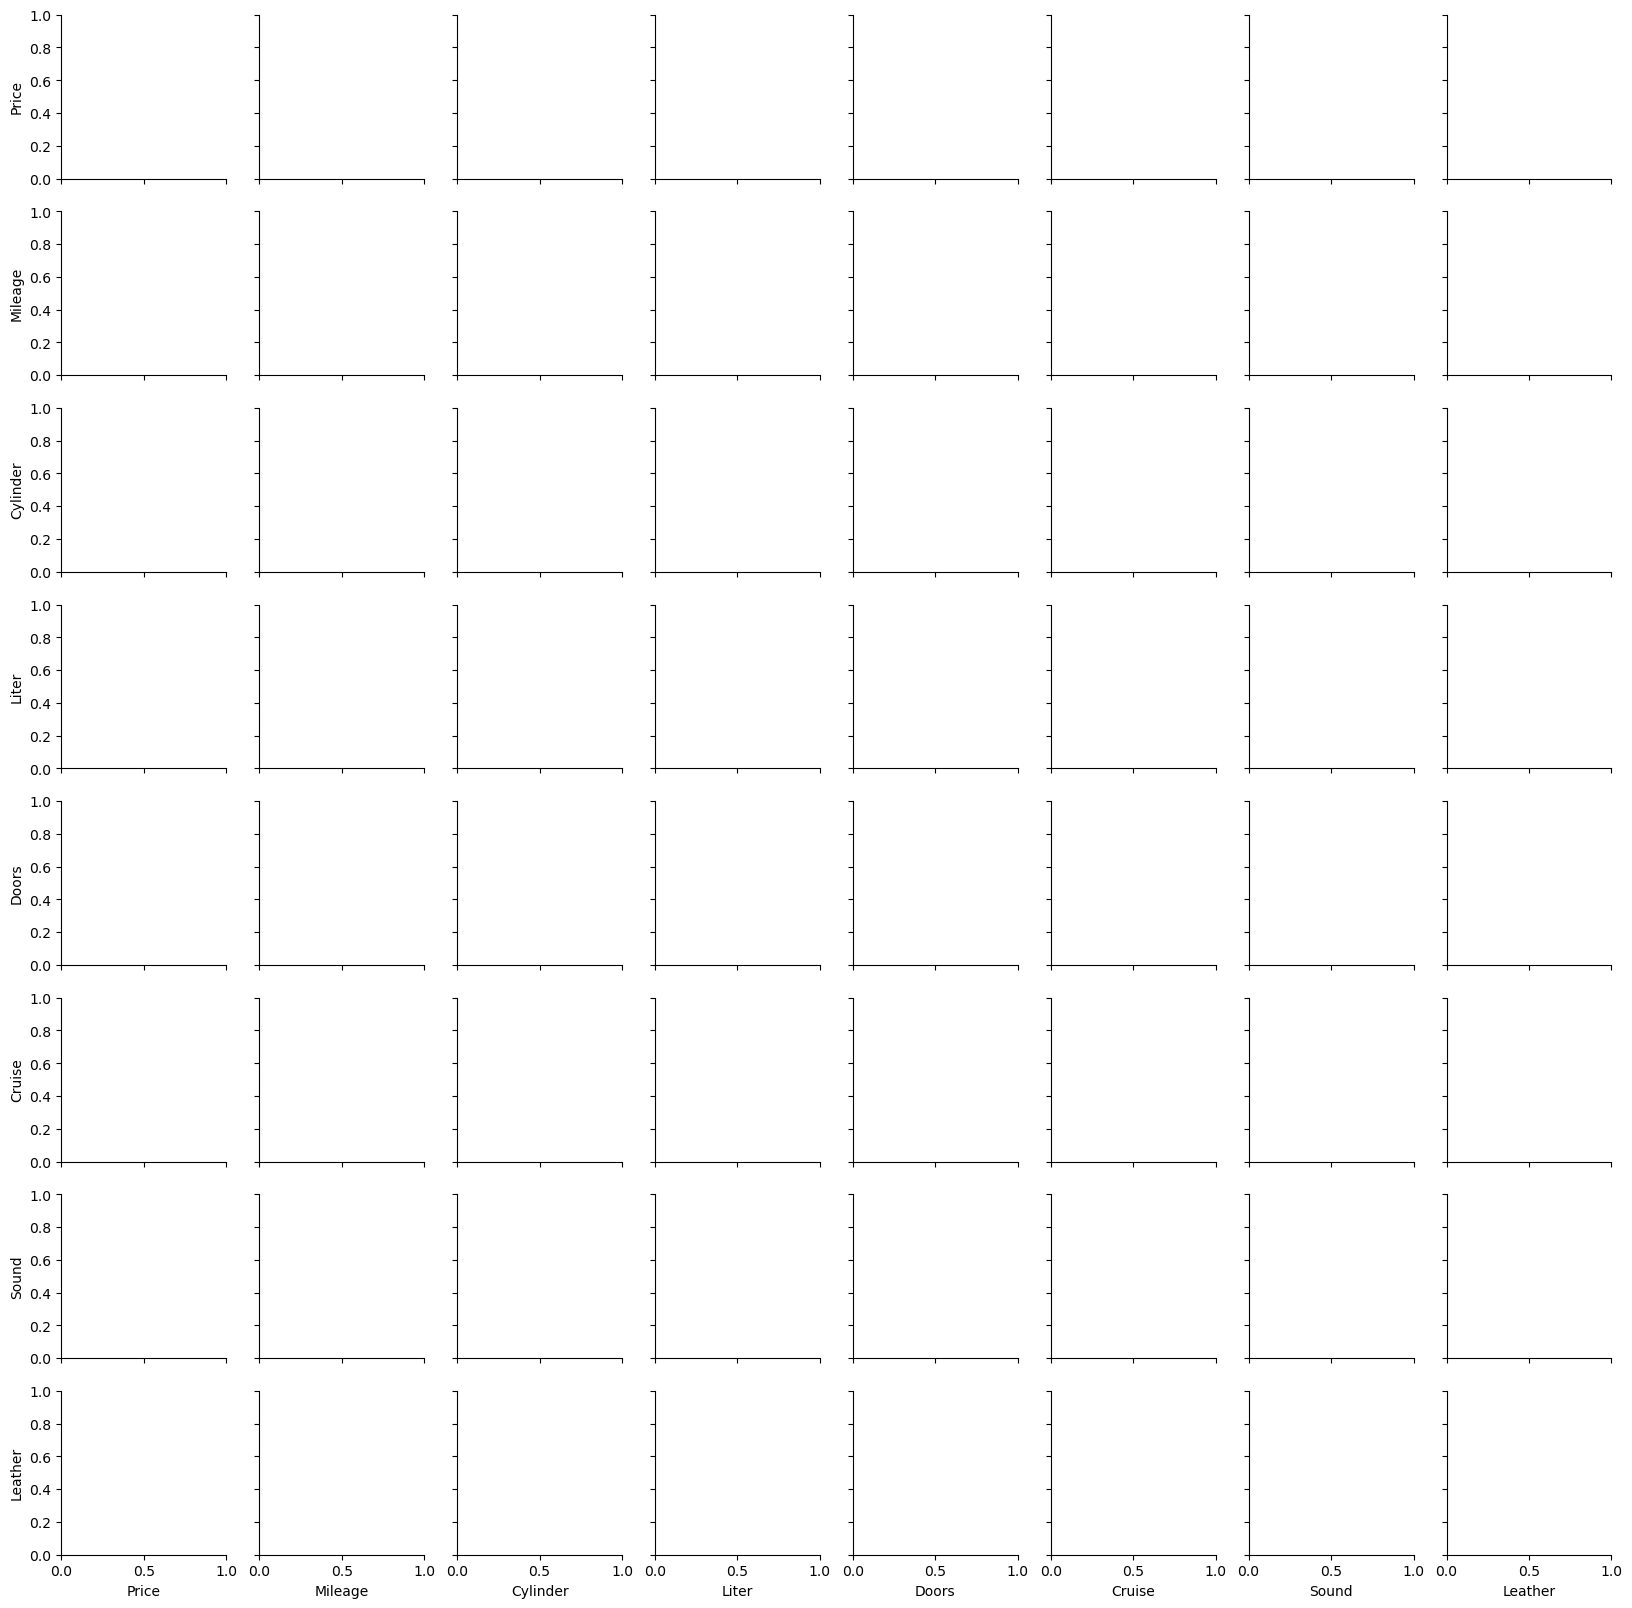

In [25]:
sns.pairplot(df,hue='Make');

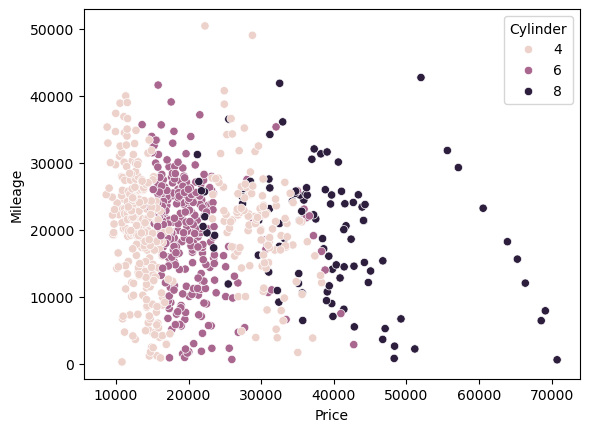

In [ ]:
sns.scatterplot(x='Price',y='Mileage',hue='Cylinder',data=df);

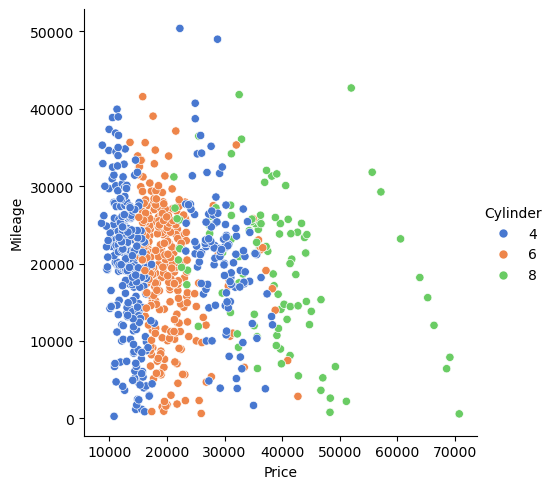

In [ ]:
sns.relplot(x='Price',y='Mileage',hue='Cylinder',palette='muted',data=df);

# P - Değeri hesaplama

In [ ]:
# Ho= arabanın fiyatı ve üzerindeki km arasinda bir bağ yok
# Ha= arabanın fiyatı ve üzerindeki km arasinda bir bağ var
# p - değerine bakıyoruz eğer p<0.05 H0 reddet alternatifi kabul et

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
_,p=ttest_ind(df['Price'],df['Mileage'])
p

0.0008662338227446263

In [ ]:
#sonuç p=0.0008662338227446263 < 0.05 sıfır hiptonezini reddedip alternatif kabul edildi

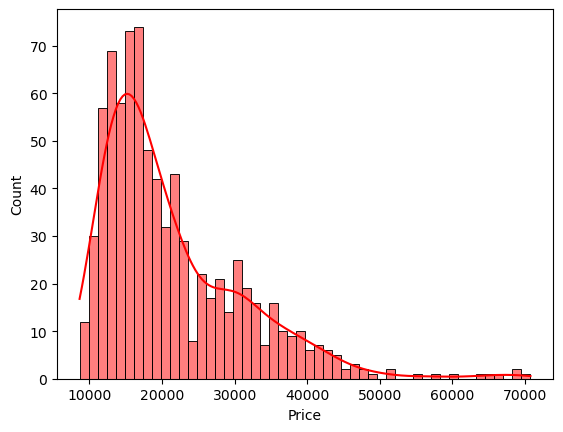

In [ ]:
sns.histplot(x=df['Price'], kde=True, color='red', bins=50);

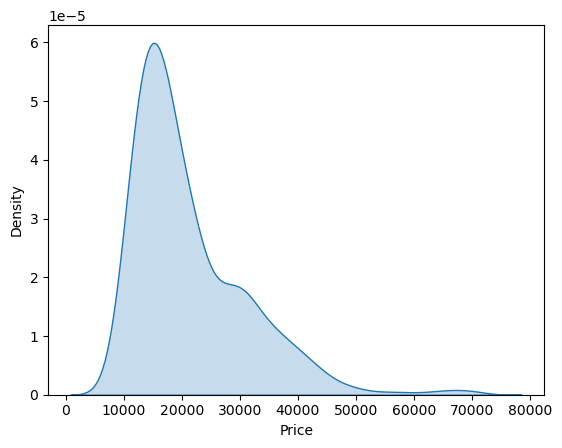

In [ ]:
sns.kdeplot(x=df['Price'],fill=True);

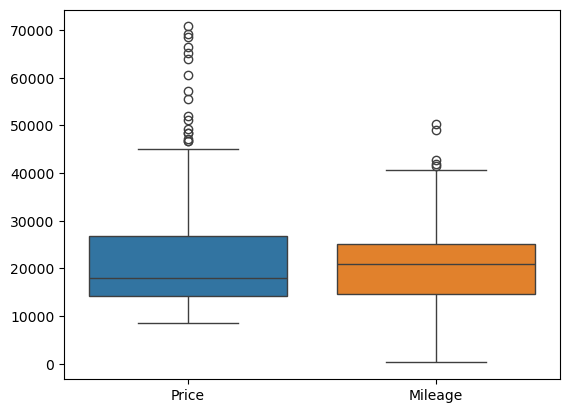

In [ ]:
sns.boxplot([df['Price'],df['Mileage']]);

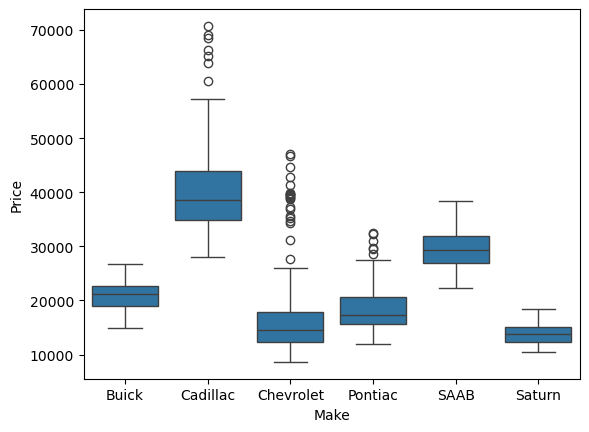

In [ ]:
sns.boxplot(x='Make',y='Price',data=df);

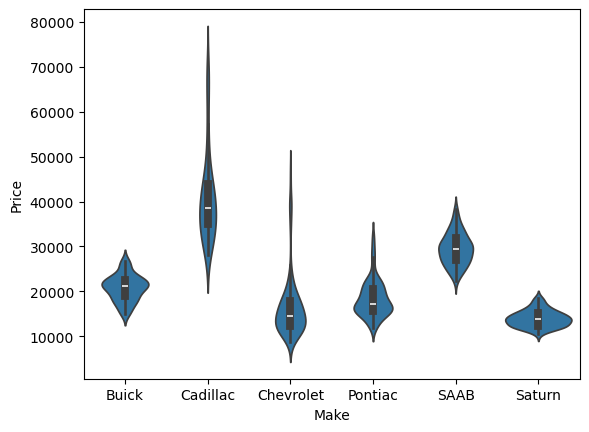

In [ ]:
sns.violinplot(x='Make',y='Price',data=df);

In [ ]:
import plotly.express as px

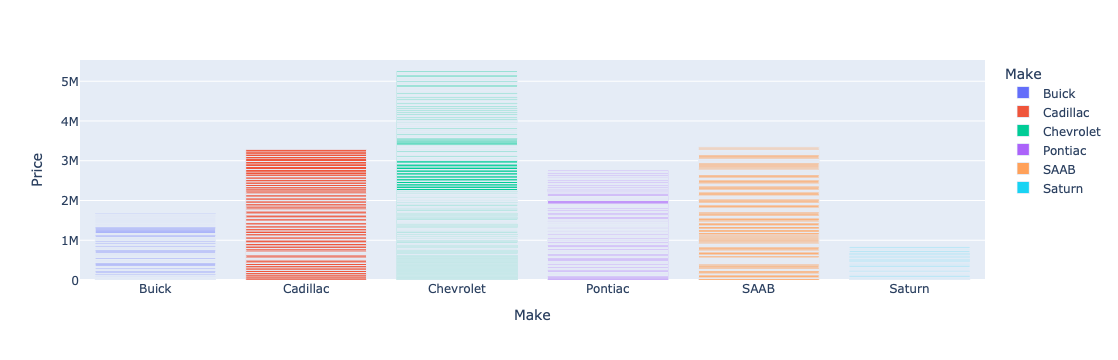

In [ ]:
px.bar(df,x='Make',y='Price', color='Make')

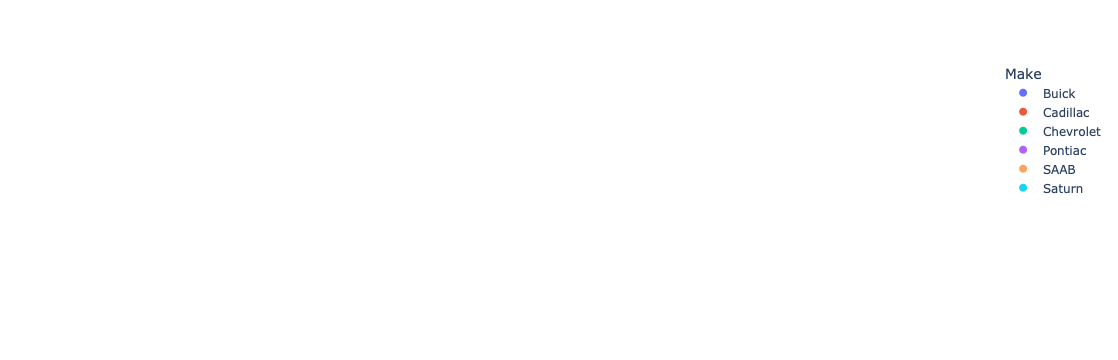

In [ ]:
px.scatter_3d(df,x='Mileage',y='Price',z='Cylinder', color='Make')

In [ ]:
#Data Science 
#MLOps

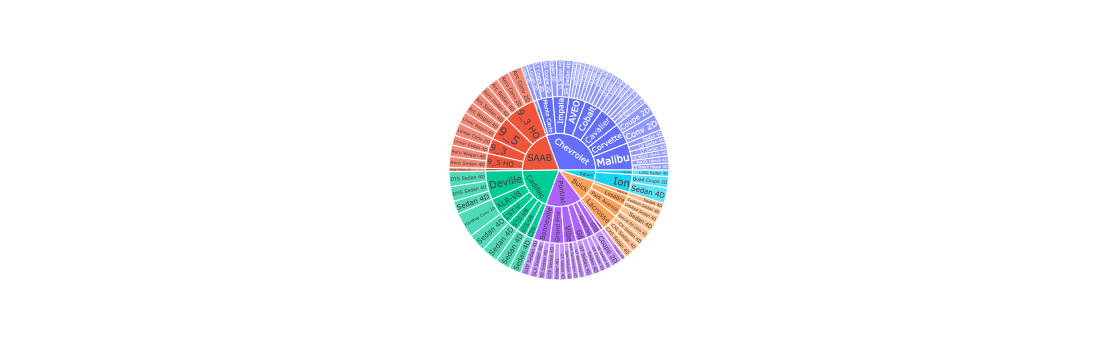

In [ ]:
px.sunburst(df,path=['Make','Model','Trim'], values='Price')

## Feature Engineering

In [ ]:
df.corr(numeric_only=True)

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

In [ ]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [ ]:
x=df[['Mileage','Cylinder','Liter','Cruise']]
y=df[['Price']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((643, 4), (161, 4))

## Modelling

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
model=lr.fit(x_train,y_train) #makine öğrenmesi

In [ ]:
tahmin=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
mean_squared_error(y_test,tahmin)**.5

7413.255792158803

In [ ]:
r2_score(y_test,tahmin)

0.3071114906997998

### Label Encoding

In [ ]:
x=df[['Mileage','Cylinder','Liter','Cruise','Make','Trim']]
y=df[['Price']]

In [ ]:
x.head()

Mileage  Cylinder  Liter  Cruise   Make      Trim
0     8221         6    3.1       1  Buick  Sedan 4D
1     9135         6    3.1       1  Buick  Sedan 4D
2    13196         6    3.1       1  Buick  Sedan 4D
3    16342         6    3.1       1  Buick  Sedan 4D
4    19832         6    3.1       1  Buick  Sedan 4D

In [ ]:
x=pd.get_dummies(x,drop_first=True) #sparse matrix

In [ ]:
x.head()

Mileage  Cylinder  Liter  Cruise  Make_Cadillac  Make_Chevrolet  \
0     8221         6    3.1       1          False           False   
1     9135         6    3.1       1          False           False   
2    13196         6    3.1       1          False           False   
3    16342         6    3.1       1          False           False   
4    19832         6    3.1       1          False           False   

   Make_Pontiac  Make_SAAB  Make_Saturn  Trim_Aero Conv 2D  ...  \
0         False      False        False              False  ...   
1         False      False        False              False  ...   
2         False      False        False              False  ...   
3         False      False        False              False  ...   
4         False      False        False              False  ...   

   Trim_Quad Coupe 2D  Trim_SE Sedan 4D  Trim_SLE Sedan 4D  Trim_SS Coupe 2D  \
0               False             False              False             False   
1               False             False              False             False   
2               False             False              False             False   
3               False             False              False             False   
4               False             False              False             False   

   Trim_SS Sedan 4D  Trim_SVM Hatchback 4D  Trim_SVM Sedan 4D  Trim_Sedan 4D  \
0             False                  False              False           True   
1             False                  False              False           True   
2             False                  False              False           True   
3             False                  False              False           True   
4             False                  False              False           True   

   Trim_Special Ed Ultra 4D  Trim_Sportwagon 4D  
0                     False               False  
1                     False               False  
2                     False               False  
3                     False               False  
4                     False               False  

[5 rows x 55 columns]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model=lr.fit(x_train,y_train) #makine öğrenmesi

In [ ]:
tahmin=model.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin)**.5 #Root Mean Squared Error

1523.6314728711297

In [ ]:
r2_score(y_test,tahmin)

0.9707311770106379

In [ ]:
pd.set_option('display.max_columns', 100) #tablodaki sutün sayısını arttırmak için

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [ ]:
Rmodel=R.fit(x_train,y_train)

In [ ]:
tahmin2=Rmodel.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin2)**.5

1575.6786242840062

In [ ]:
r2_score(y_test,tahmin2)

0.9686973810318732

In [ ]:
Lmodel=L.fit(x_train,y_train)

In [ ]:
tahmin3=Lmodel.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin3)**.5

1527.043092830227

In [ ]:
r2_score(y_test,tahmin3)

0.9705999564419019

In [ ]:
Emodel=E.fit(x_train,y_train)

In [ ]:
tahmin4=Emodel.predict(x_test)

In [ ]:
mean_squared_error(y_test,tahmin4)**.5

5916.121656152222

In [ ]:
r2_score(y_test,tahmin4)

0.558714578586518

In [ ]:
def model(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return mean_squared_error(y_test, pred)**0.5, r2_score(y_test, pred)


In [ ]:
model(x, y, Ridge())

(1575.6786242840062, 0.9686973810318732)

In [ ]:
model(x, y, Lasso())

(1527.043092830227, 0.9705999564419019)

In [ ]:
model(x, y, LinearRegression())

(1523.6314728711297, 0.9707311770106379)

In [ ]:
model(x, y, ElasticNet())

(5916.121656152222, 0.558714578586518)

In [ ]:
#Coefficients - Katsayılar

In [ ]:
lr.coef_

array([[-1.98809431e-01, -2.60219053e+03,  7.38331957e+03,
        -1.05024563e+02,  1.55364461e+04, -2.81688090e+03,
        -3.59594608e+03,  6.85100028e+03, -2.29878609e+03,
         3.90588224e+03, -2.64773527e+03, -1.26995361e+03,
         7.05993990e+03, -2.22310734e+02,  1.38127365e+02,
        -8.04390904e+03, -6.79607391e+03, -6.85437716e+03,
         3.54018314e+03, -5.72790226e+03, -1.11979437e+04,
        -8.32030557e+03, -7.59431897e+03, -8.10925499e+03,
        -6.53924263e+03, -3.82628105e+02, -5.76220228e+03,
        -3.63992297e+03,  1.67584142e+04, -5.32327214e+03,
        -7.83067529e+03, -4.64523486e+03, -7.53303979e+03,
        -6.65186020e+03, -7.63546793e+03, -6.87040602e+03,
        -6.33606759e+03, -3.92489639e+03, -7.03882417e+03,
        -6.17480932e+03, -8.14421976e+03,  4.52867027e+03,
        -2.53728086e+03, -2.10433902e+03, -7.88530569e+03,
        -6.07227049e+03, -6.65263910e+03, -5.53516395e+03,
        -4.78023915e+03, -3.13661125e+03, -6.92039280e+0

In [ ]:
feature_importance = pd.DataFrame({'feature': x_train.columns, 'importance': lr.coef_[0]})

In [ ]:
feature_importance=feature_importance.sort_values(by='importance', ascending=False)

In [ ]:
feature_importance

feature    importance
0                    Mileage     -0.198809
1                   Cylinder  -2602.190533
2                      Liter   7383.319566
3                     Cruise   -105.024563
4              Make_Cadillac  15536.446130
5             Make_Chevrolet  -2816.880903
6               Make_Pontiac  -3595.946075
7                  Make_SAAB   6851.000276
8                Make_Saturn  -2298.786085
9          Trim_Aero Conv 2D   3905.882237
10        Trim_Aero Sedan 4D  -2647.735267
11        Trim_Aero Wagon 4D  -1269.953605
12          Trim_Arc Conv 2D   7059.939896
13         Trim_Arc Sedan 4D   -222.310734
14         Trim_Arc Wagon 4D    138.127365
15          Trim_CX Sedan 4D  -8043.909039
16         Trim_CXL Sedan 4D  -6796.073911
17         Trim_CXS Sedan 4D  -6854.377165
18              Trim_Conv 2D   3540.183141
19             Trim_Coupe 2D  -5727.902260
20      Trim_Custom Sedan 4D -11197.943729
21         Trim_DHS Sedan 4D  -8320.305567
22         Trim_DTS Sedan 4D  -7594.318973
23          Trim_GT Coupe 2D  -8109.254993
24          Trim_GT Sedan 4D  -6539.242633
25        Trim_GT Sportwagon   -382.628105
26         Trim_GTP Sedan 4D  -5762.202280
27         Trim_GXP Sedan 4D  -3639.922969
28      Trim_Hardtop Conv 2D  16758.414214
29        Trim_L300 Sedan 4D  -5323.272136
30          Trim_LS Coupe 2D  -7830.675291
31      Trim_LS Hatchback 4D  -4645.234857
32     Trim_LS MAXX Hback 4D  -7533.039792
33          Trim_LS Sedan 4D  -6651.860202
34    Trim_LS Sport Coupe 2D  -7635.467926
35    Trim_LS Sport Sedan 4D  -6870.406019
36          Trim_LT Coupe 2D  -6336.067587
37      Trim_LT Hatchback 4D  -3924.896395
38     Trim_LT MAXX Hback 4D  -7038.824171
39          Trim_LT Sedan 4D  -6174.809319
40     Trim_Limited Sedan 4D  -8144.219762
41       Trim_Linear Conv 2D   4528.670272
42      Trim_Linear Sedan 4D  -2537.280862
43      Trim_Linear Wagon 4D  -2104.339024
44        Trim_MAXX Hback 4D  -7885.305685
45        Trim_Quad Coupe 2D  -6072.270492
46          Trim_SE Sedan 4D  -6652.639100
47         Trim_SLE Sedan 4D  -5535.163950
48          Trim_SS Coupe 2D  -4780.239150
49          Trim_SS Sedan 4D  -3136.611254
50     Trim_SVM Hatchback 4D  -6920.392799
51         Trim_SVM Sedan 4D  -5515.189525
52             Trim_Sedan 4D  -7770.244748
53  Trim_Special Ed Ultra 4D  -4875.643850
54        Trim_Sportwagon 4D  -1453.737428

In [ ]:
import matplotlib.pyplot as plt

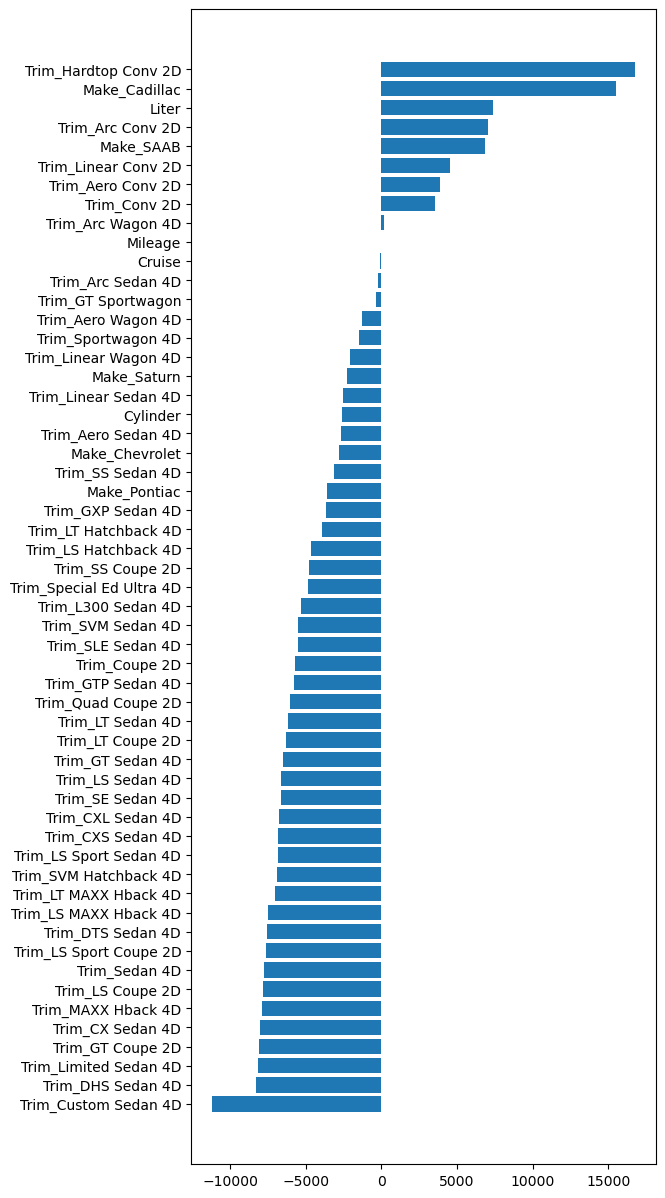

In [ ]:
plt.figure(figsize= (6,15))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.gca().invert_yaxis()

### Regression da başarı oranı için bilinmesi gerekenler
1- R2_score > 0.85
2- Düşük RMSE
3- Residuals should follow normal distribution 

In [ ]:
residuals=tahmin-y_test

In [ ]:
residuals

Price
192  -559.667911
717 -1027.528386
168 -1144.233441
522 -2909.433116
536  -494.086073
..           ...
658   812.069687
356 -4025.396437
525 -2361.161783
748   961.806180
517 -3242.062971

[161 rows x 1 columns]

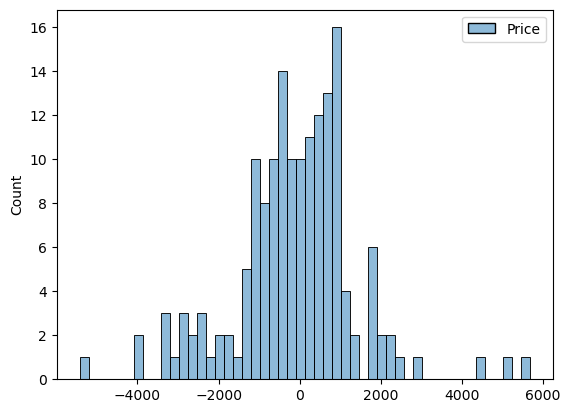

In [ ]:
sns.histplot(residuals, bins=50);

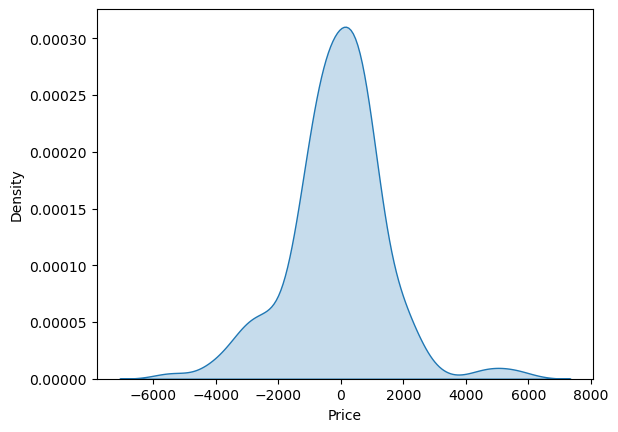

In [ ]:
sns.kdeplot(x=residuals['Price'],fill=True);

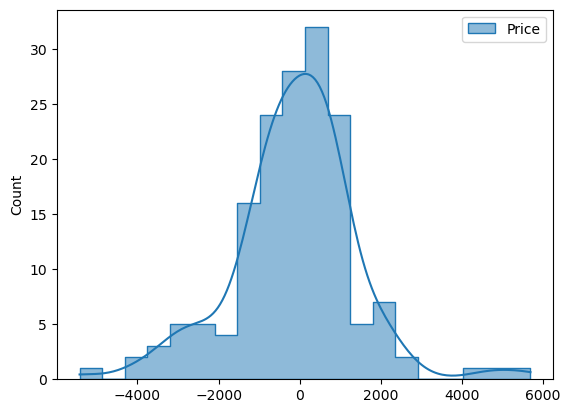

In [ ]:
sns.histplot(residuals, kde=True, bins=20, color='red', alpha=0.5, label='Residuals', element='step');

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor()

In [ ]:
model(x, y, DecisionTreeRegressor())

(1821.2686799704459, 0.9581790950317972)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
ET=ExtraTreesRegressor()

In [ ]:
model(x, y, ExtraTreesRegressor())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(894.2226872847065, 0.9899182306775515)